In [1]:
# Shopping Mall project clustring and identification of sales periad pattern

In [2]:
# Import the necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# it is the default setting. It will try to fit the entire diagram in the jupyter notbook size.
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\ASUS\\Learnbay\\ML_Projects\\Customer_segmentation_clustering_project'

In [4]:
df=pd.read_excel("Customer_Segment.xlsx")
df.head(10)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,set 7 babushka nesting boxes,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,glass star frosted t-light holder,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,hand warmer union jack,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,hand warmer red polka dot,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,assorted colour bird ornament,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


### Problem Statement
* segment(group/cluster) customer on the basis of buying pattern 
   RFM(Recency Frequency Pattern)
* Sales trends for day months season time by invoice number
* Higest sales trends item wise

In [6]:
### Observing the key fratures of the data frame
df.info()

# Observations
# 1. total 541909 rows are present( Records )
# 2. 9 data columns
# 3. missing values are in column no 2 (huge no.),3,7
# 4. Data types: 1 datetime(ns),2 float, 1 int, 5 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
# number of unique values in each column
df.nunique()

InvoiceNo      25900
StockCode       4070
lower            953
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

#### Observations
* Total no of invoices: 25900
* Total no of customers: 4372

### Lets create a new dataset and whatever feature is required to calculate
    the RFM that will be considered in the data set.
* Invoice no is required. StockCode, Description, Lower & country is not 
   important to find RFM.

## To calculate the RFM keep significant columns only

In [8]:
df1=df.drop(["StockCode","Description","lower","Country"],axis=1)

In [9]:
df1.head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
5,536365,2,2010-12-01 08:26:00,7.65,17850.0
6,536365,6,2010-12-01 08:26:00,4.25,17850.0
7,536366,6,2010-12-01 08:28:00,1.85,17850.0
8,536366,6,2010-12-01 08:28:00,1.85,17850.0
9,536367,32,2010-12-01 08:34:00,1.69,13047.0


In [10]:
## Missing values
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

##### There are huge missing values in the customer ids

* When there is customer id missing for those records, it is not advisable to
  any imputation technique because may be customer was not happy to give the 
  info and if we impute the missing values by any method it may leads to the 
  data filled with wrong values. So if it is the case batter drop the missing 
  values records.

######Drop the missing values records in CustomerID. Because we cannot track the True customer.

In [11]:
df1.dropna(axis=0,how='any',subset=["CustomerID"],inplace=True)

In [12]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Quantity     406829 non-null  int64         
 2   InvoiceDate  406829 non-null  datetime64[ns]
 3   UnitPrice    406829 non-null  float64       
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 18.6+ MB


In [15]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Minimum price zero means freebees items.
#### In Quantity- What is the meaning of this?
 * It is returened or defective items.

In [16]:
# Just to see how many items has unit price is zero
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [17]:
df1[df1["UnitPrice"]==0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [18]:
# Count number of observations having neg quantity or returned
df1[df1["Quantity"]<0]['Quantity'].count()

8905

In [19]:
df1[df1["Quantity"]<0].count()

InvoiceNo      8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
dtype: int64

##### Out of total no of observations 8905 observations are there where 
    the customer either return the item or the item is defective.

In [20]:
df1[df1["Quantity"]<-10000].value_counts()

InvoiceNo  Quantity  InvoiceDate          UnitPrice  CustomerID
C541433    -74215    2011-01-18 10:17:00  1.04       12346.0       1
C581484    -80995    2011-12-09 09:27:00  2.08       16446.0       1
dtype: int64

## Further investigations i had to do

In [21]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


#### WE will add one more feature by multiplying quantity and unitprice 
   and make it a " Total" price item wise

In [22]:
df1["Total_Price"]=df1["Quantity"]*df1["UnitPrice"]
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


#### Now we can drop the quantity and unit price, we can make use of 
     Total_Price now

In [23]:
df1=df1.drop(["Quantity","UnitPrice"],axis=1)
df1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_Price
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   Total_Price  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 15.5+ MB


### By keeping the invoice no as base wwe will apply groupby function.
 * and we will add the total _price of same invoice no.
 * to do this first we will make two different dataset.
 * in one dataset we will have only two features which are invoice no and    Total_price.
 * we will apply groupby function on this dataset and then merge the final dataset with the other dataset.

In [25]:
df2=df1.drop(['InvoiceDate','CustomerID'],axis=1)

In [26]:
df2.head()

,InvoiceNo,Total_Price
0,536365,15.30
1,536365,20.34
2,536365,22.00
3,536365,20.34
4,536365,20.34


In [27]:
# Calculate the final total amount w.r.t dedicated invoiceNo.
df2=df2.groupby(["InvoiceNo"]).sum()
df2.head(10)

,Total_Price
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
536370,855.86
536371,204.00
536372,22.20
536373,259.86


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 536365 to C581569
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total_Price  22190 non-null  float64
dtypes: float64(1)
memory usage: 346.7+ KB


In [29]:
df2_final=df2.reset_index()
df2_final.head()

,InvoiceNo,Total_Price
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [30]:
df1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_Price
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [31]:
df1=df1.drop(["Total_Price"],axis=1)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.4+ MB


#### In the above column df1 there are large no of observations/ rows because
     of duplicate invoices.
    * So dropping the duplicate invoices.

In [33]:
df1_final=df1.drop_duplicates(subset="InvoiceNo")
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22190 entries, 0 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 693.4+ KB


### Now join the both datasets df2_final and df1_final

### We can merge these two dataframes.

In [34]:
df_final=pd.merge(df1_final,df2_final,how="left",on="InvoiceNo")
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_Price
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


#### Now we can play with the dataset, we can calculate RFM

###### Lets calculate the oldest date of invoice and latest date of invoice

In [35]:
max(df_final["InvoiceDate"]) # latest date or last date of invoice

Timestamp('2011-12-09 12:50:00')

In [36]:
min(df_final["InvoiceDate"]) # oldest date

Timestamp('2010-12-01 08:26:00')

In [37]:
# just create a latest date just 2 days more than the last date of invoice

In [38]:
import datetime as dt
latest_date=dt.datetime(2011,12,11)

In [39]:
latest_date

datetime.datetime(2011, 12, 11, 0, 0)

#### formula for recency
* R=last date of invoice generated-customer last visit of the customer
#### frequency
* no of times a perticular invoice no is repeated wrt a customer ID
#### Monetory
* Total how much money spent by the perticular customer ID.

In [40]:
# we have set the latest date as 11th dec 2011. 
# we will use aggregation function and calculate RFM as per the customer ID.

In [41]:
RFM_Score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                              "InvoiceNo":lambda x:x.count(),
                                              "Total_Price":lambda x:x.sum()})

In [42]:
RFM_Score.head()

,InvoiceDate,InvoiceNo,Total_Price
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [43]:
RFM_Score=RFM_Score.reset_index()
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total_Price
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [45]:
#RFM_Score=RFM_Score.drop("index",axis=1)

In [46]:
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total_Price
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [47]:
# Renaming the column as Recency Frequency and Monetory
RFM_Score=RFM_Score.rename(columns={"InvoiceDate":"Recency",
                                    "InvoiceNo":"Frequency",
                                   "Total_Price":"Monetory"})

In [48]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetory
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


##### we have to apply some kkind of benchmark for recency( give labels to the categories)



In [49]:
RFM_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Recency     4372 non-null   int64  
 2   Frequency   4372 non-null   int64  
 3   Monetory    4372 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 136.8 KB


In [50]:
RFM_Score.describe()

,CustomerID,Recency,Frequency,Monetory
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.581199,5.075480,1898.459701
std,1722.390705,100.772139,9.338754,8219.345141
min,12346.000000,1.000000,1.000000,-4287.630000
25%,13812.750000,17.000000,1.000000,293.362500
50%,15300.500000,51.000000,3.000000,648.075000
75%,16778.250000,144.000000,5.000000,1611.725000
max,18287.000000,374.000000,248.000000,279489.020000


<Axes: xlabel='Recency', ylabel='Density'>

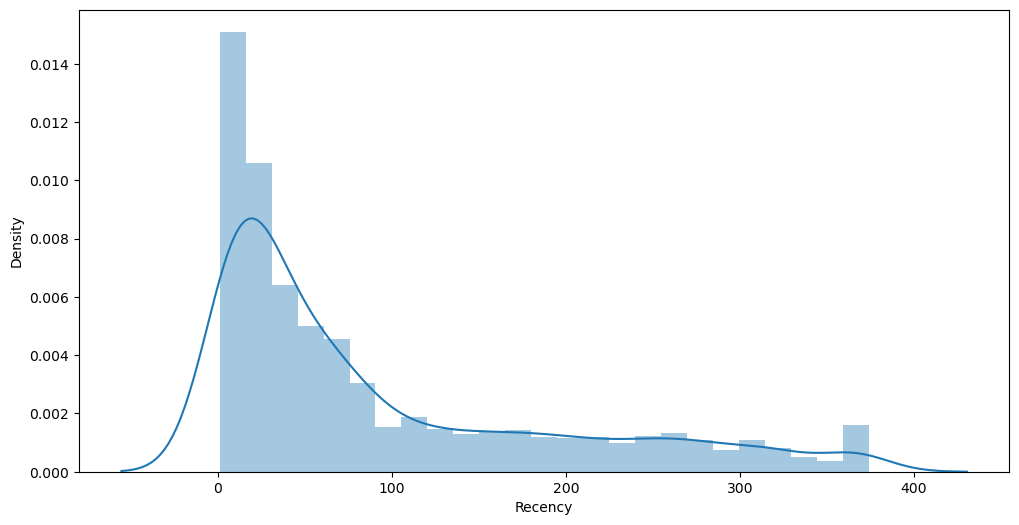

In [51]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.distplot(RFM_Score["Recency"],kde=True)

<Axes: xlabel='Frequency', ylabel='Density'>

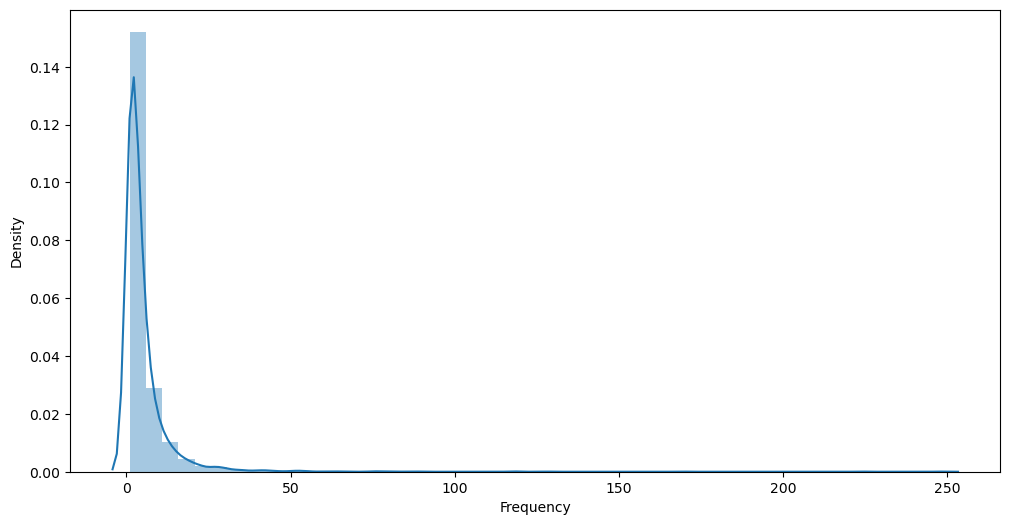

In [52]:
plt.figure(figsize=(12,6))
sns.distplot(RFM_Score["Frequency"],kde=True)

<Axes: xlabel='Monetory', ylabel='Density'>

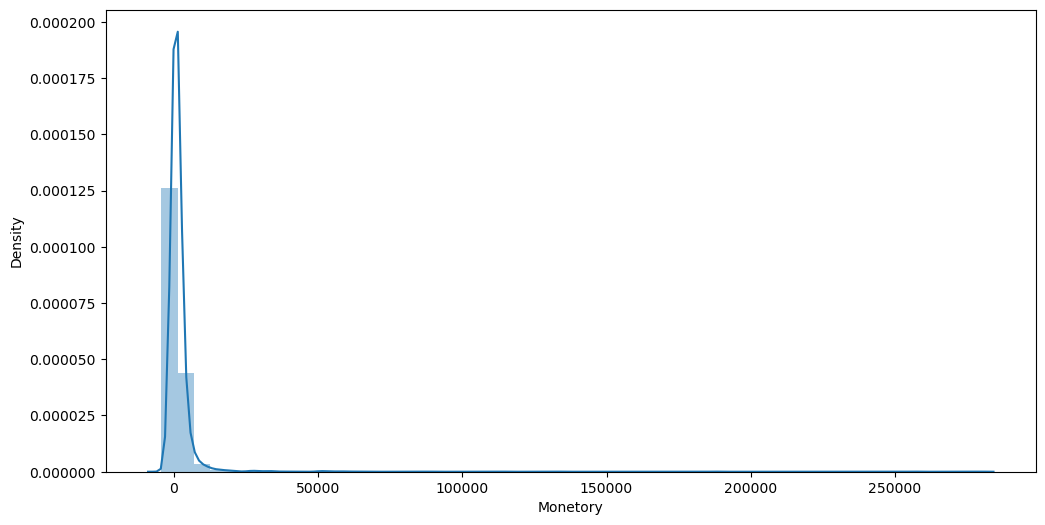

In [53]:
plt.figure(figsize=(12,6))
sns.distplot(RFM_Score["Monetory"],kde=True)

[Text(0.5, 0, 'Recency')]

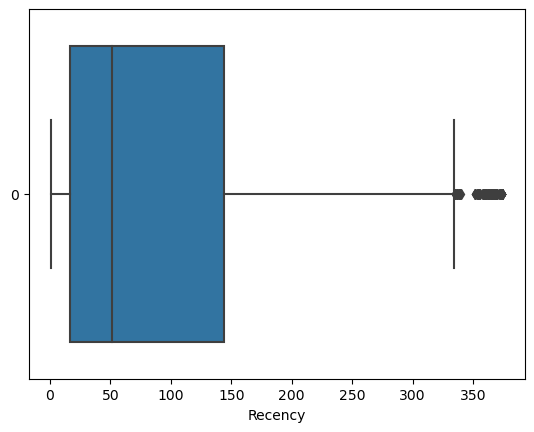

In [54]:
 sns.boxplot(RFM_Score['Recency'],orient='h').set(xlabel='Recency')

<Axes: xlabel='Recency', ylabel='count'>

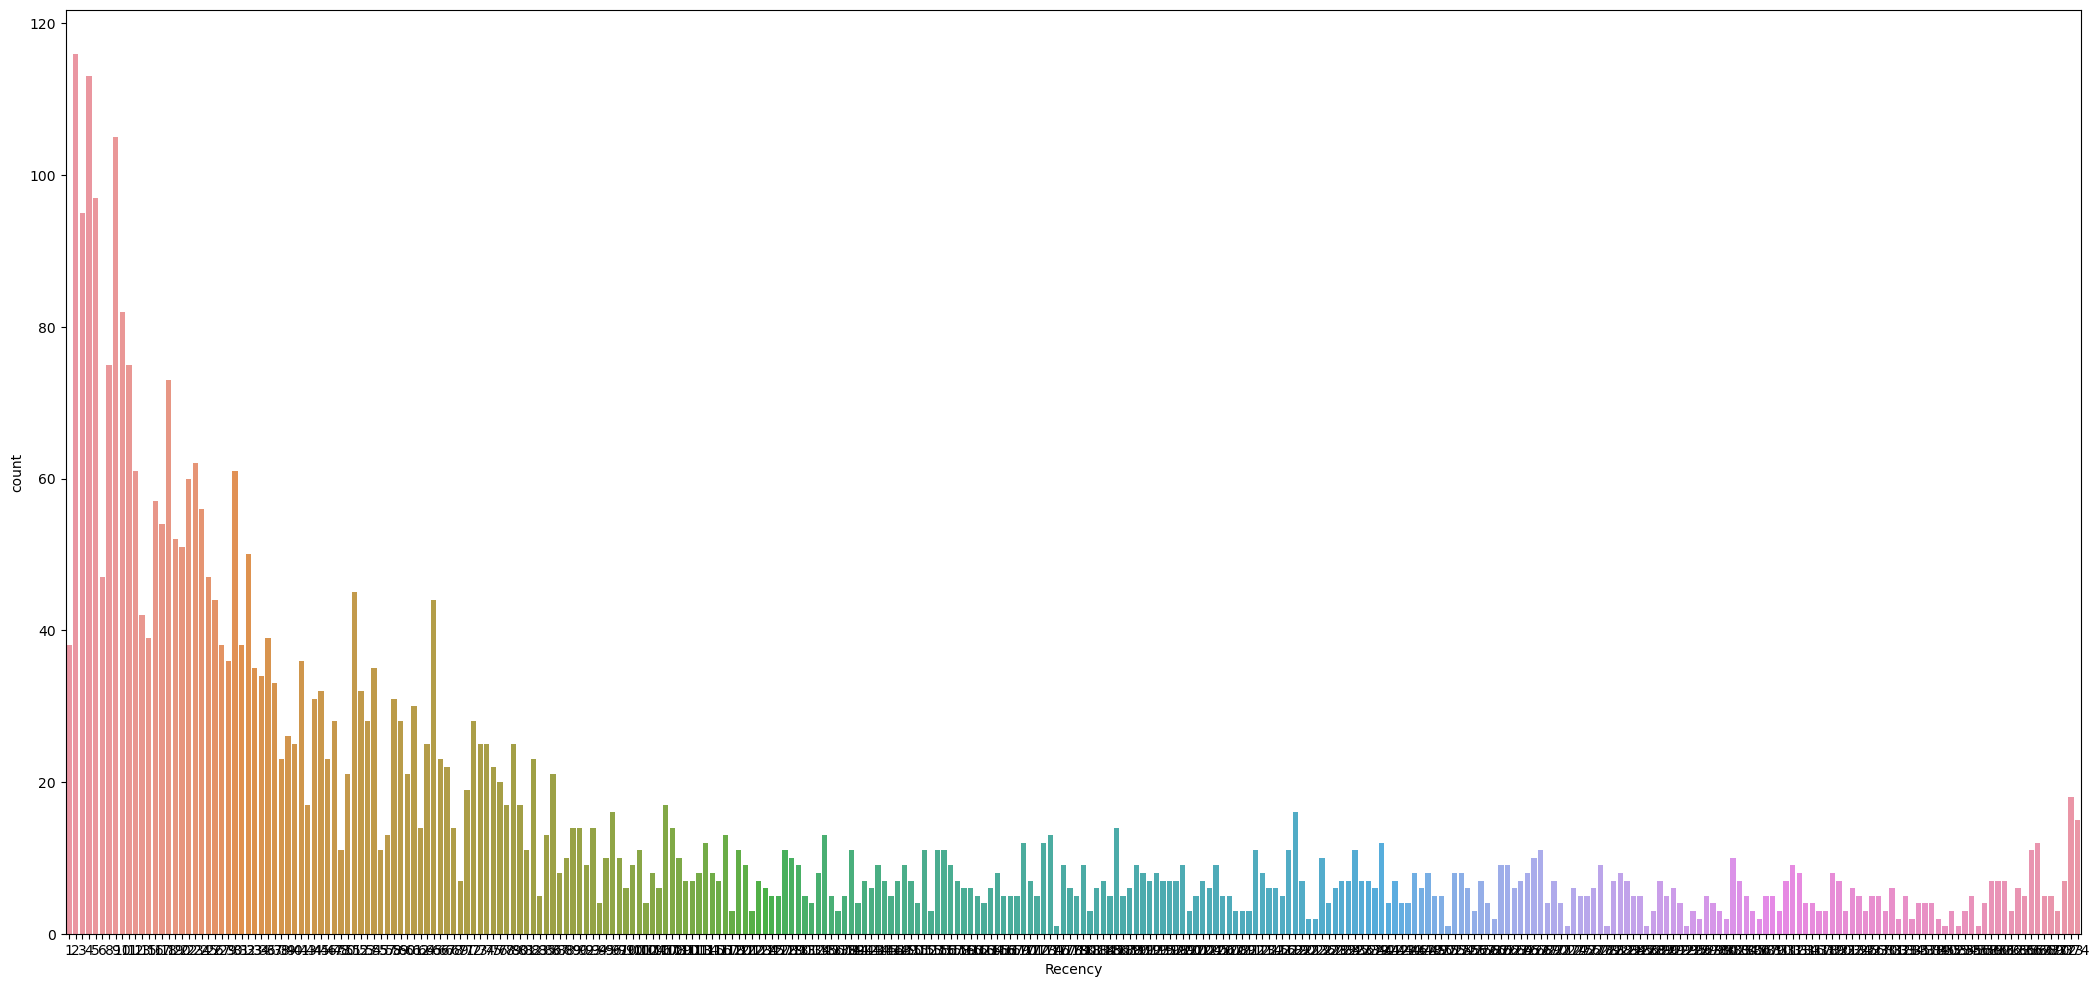

In [55]:
plt.figure(figsize=(26,12))
sns.countplot(x=RFM_Score['Recency'])

In [56]:
# setting the benchmark using quantile method

In [57]:
RFM_Score["Recency"].quantile(q=[0.25,0.50,0.75])

0.25     17.0
0.50     51.0
0.75    144.0
Name: Recency, dtype: float64

### ECDF Plot 
* Python seaborn distribution plot
* ECDF-Emperical Commulative Distribution Function
* It represents the proportion or counts of the observations falling below 
  each unique value in a dataset.

<Axes: xlabel='Recency', ylabel='Proportion'>

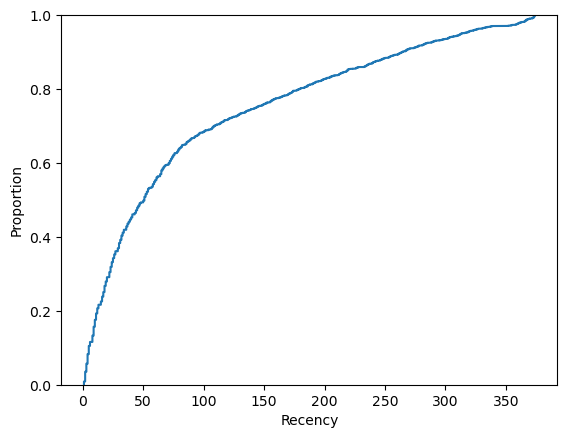

In [58]:
sns.ecdfplot(data=RFM_Score["Recency"])

In [59]:
# we can change the quantile range as per the requirement of the dataset
RFM_Score["Recency"].quantile(q=[0.35,0.60,0.80])

0.35     26.0
0.60     72.0
0.80    179.0
Name: Recency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Proportion'>

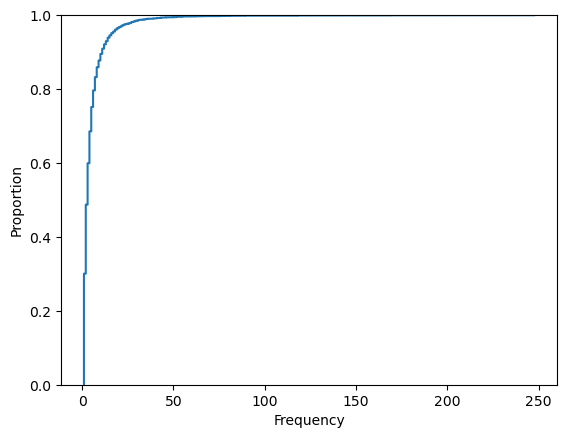

In [60]:
sns.ecdfplot(data=RFM_Score["Frequency"])

In [61]:
RFM_Score["Frequency"].quantile(q=[0.25,0.50,0.75])

0.25    1.0
0.50    3.0
0.75    5.0
Name: Frequency, dtype: float64

#### Observation
* frequency=f
* if f<1 = 1
* 1<f<3 = 2
* 3<f<5 = 3
* 5<f =4

* by analysing this we can conclude that if one customer is having freq 6
 and another customer is having frequency 100 will have same marks.
    this is not justifiable. So we will use another quantile technique to 
    make the justice.

In [62]:
RFM_Score["Frequency"].quantile(q=[0.98,0.995,0.998])

0.980    27.000
0.995    52.000
0.998    78.032
Name: Frequency, dtype: float64

#### Observations
* catagories
* 1-27 times= 1
* 27-52 times= 2
* 52-78 times= 3
* grater then 78 times =4

* this is much batter categorization

<Axes: xlabel='Monetory', ylabel='Proportion'>

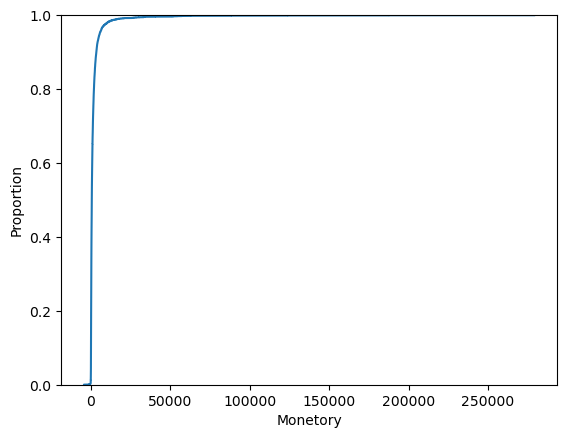

In [63]:
sns.ecdfplot(data=RFM_Score["Monetory"])

In [64]:
print(min(RFM_Score["Monetory"]))
print(max(RFM_Score["Monetory"]))

-4287.63
279489.01999999996


In [78]:
RFM_Score["Monetory"].quantile(q=[0.65,0.95,0.998])

0.650     1079.02600
0.950     5625.00400
0.998    60253.65008
Name: Monetory, dtype: float64

In [79]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,12346.0,326,2,0.00,1,1,1
1,12347.0,3,7,4310.00,4,1,2
2,12348.0,76,4,1797.24,2,1,2
3,12349.0,19,1,1757.55,4,1,2
4,12350.0,311,1,334.40,1,1,1


In [80]:
quantile100=RFM_Score.quantile(q=[0.30,0.53,0.80])
quantile200=RFM_Score.quantile(q=[0.98,0.995,0.998])
quantile300=RFM_Score.quantile(q=[0.65,0.95,0.998])

In [81]:
# Now we can pass this to R F M scores to the customers

In [82]:
# Recency
def R_Scoring(x,p,d):
    if x<=d[p][0.30]:
        return 4
    if x<=d[p][0.53]:
        return 3
    if x<=d[p][0.80]:
        return 2
    else:
        return 1
# Frequency
def F_Scoring(x,p,d):
    if x<=d[p][0.98]:
        return 1
    if x<=d[p][0.995]:
        return 2
    if x<=d[p][0.998]:
        return 3
    else:
        return 4
# Monetory
def M_Scoring(x,p,d):
    if x<=d[p][0.65]:
        return 1
    if x<=d[p][0.95]:
        return 2
    if x<=d[p][0.998]:
        return 3
    else:
        return 4

##### Creation of new column  R F M and Passing the quantile variable

In [83]:
RFM_Score["R"]=RFM_Score["Recency"].apply(R_Scoring,args=("Recency",quantile100))
RFM_Score["F"]=RFM_Score["Frequency"].apply(F_Scoring,args=("Frequency",quantile200))
RFM_Score["M"]=RFM_Score["Monetory"].apply(M_Scoring,args=("Monetory",quantile300))

In [84]:
RFM_Score.head(20)

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,12346.0,326,2,0.00,1,1,1
1,12347.0,3,7,4310.00,4,1,2
2,12348.0,76,4,1797.24,2,1,2
3,12349.0,19,1,1757.55,4,1,2
4,12350.0,311,1,334.40,1,1,1
5,12352.0,37,11,1545.41,3,1,2
6,12353.0,205,1,89.00,1,1,1
7,12354.0,233,1,1079.40,1,1,2
8,12355.0,215,1,459.40,1,1,1
9,12356.0,23,3,2811.43,3,1,2


In [85]:
## RFM_ID for the customers
RFM_Score["RFM_ID"]=RFM_Score.R.map(str)+RFM_Score.F.map(str)+RFM_Score.M.map(str)
RFM_Score

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_ID
0,12346.0,326,2,0.00,1,1,1,111
1,12347.0,3,7,4310.00,4,1,2,412
2,12348.0,76,4,1797.24,2,1,2,212
3,12349.0,19,1,1757.55,4,1,2,412
4,12350.0,311,1,334.40,1,1,1,111
...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111
4368,18281.0,181,1,80.82,1,1,1,111
4369,18282.0,8,3,176.60,4,1,1,411
4370,18283.0,4,16,2094.88,4,1,2,412


In [86]:
# Add new column RFM_Sum
RFM_Score["RFM_Sum"]=RFM_Score[["R","F","M"]].sum(axis=1)

In [87]:
RFM_Score

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_ID,RFM_Sum
0,12346.0,326,2,0.00,1,1,1,111,3
1,12347.0,3,7,4310.00,4,1,2,412,7
2,12348.0,76,4,1797.24,2,1,2,212,5
3,12349.0,19,1,1757.55,4,1,2,412,7
4,12350.0,311,1,334.40,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3
4368,18281.0,181,1,80.82,1,1,1,111,3
4369,18282.0,8,3,176.60,4,1,1,411,6
4370,18283.0,4,16,2094.88,4,1,2,412,7


In [88]:
## We can give loyality labels w r t RFM_Sum as Platinum(p), Diamond(d),
## gold(g), Silver(s)
Loyality_level=["Silver","Gold","Diamond","Platinum"]

In [89]:
RFM_Score.RFM_ID.unique()

array(['111', '412', '212', '312', '112', '313', '413', '211', '411',
       '311', '213', '314', '423', '422', '113', '443', '434', '433',
       '444', '333', '424', '122'], dtype=object)

In [90]:
RFM_Score.RFM_Sum.unique()

array([ 3,  7,  5,  6,  4,  8,  9, 11, 10, 12], dtype=int64)

In [91]:
# apply the qcut function
RFM_Score["Loyality"]=pd.qcut(RFM_Score.RFM_Sum,q=4,labels=Loyality_level)

In [92]:
RFM_Score

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_ID,RFM_Sum,Loyality
0,12346.0,326,2,0.00,1,1,1,111,3,Silver
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum
4,12350.0,311,1,334.40,1,1,1,111,3,Silver
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond
4370,18283.0,4,16,2094.88,4,1,2,412,7,Platinum


<Axes: xlabel='Monetory', ylabel='RFM_Sum'>

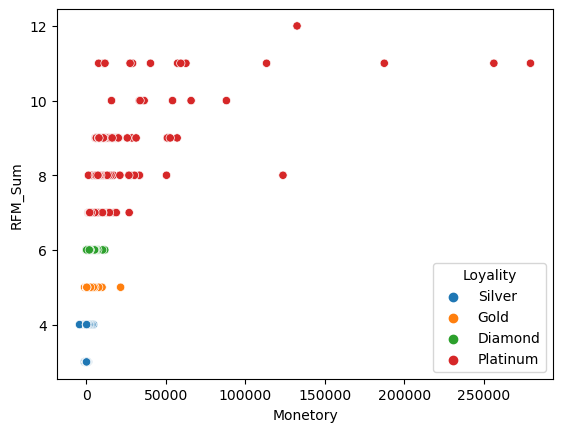

In [93]:
# Scatter plot for Recency, Frequency and Monetory
sns.scatterplot(data=RFM_Score, x="Monetory",y="RFM_Sum", hue="Loyality")

<Axes: xlabel='Recency', ylabel='RFM_Sum'>

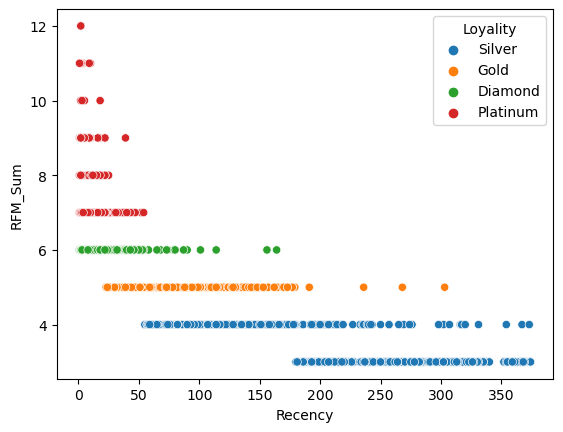

In [94]:
sns.scatterplot(data=RFM_Score, x="Recency",y="RFM_Sum", hue="Loyality")

<Axes: xlabel='Frequency', ylabel='RFM_Sum'>

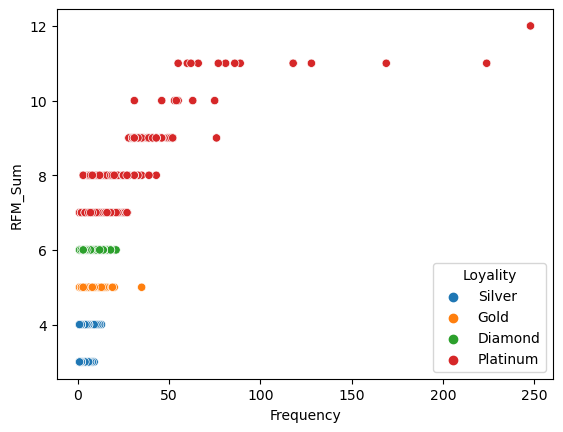

In [95]:
sns.scatterplot(data=RFM_Score, x="Frequency",y="RFM_Sum", hue="Loyality")

#### Apply k_means clustring algorithm on RFM_Sum


In [96]:
New_Data=RFM_Score[["RFM_Sum"]]
New_Data.head()

,RFM_Sum
0,3
1,7
2,5
3,7
4,3


#### To apply K_means algorithm we first find what is the best value of K

In [97]:
# Applying the K_means algorithm
from sklearn.cluster import KMeans

SSE=[]

for K in range(1,30):
    Kmeans=KMeans(n_clusters=K,init="k-means++")
    Kmeans.fit(New_Data)
    SSE.append(Kmeans.inertia_)

In [98]:
SSE # Sum of square errors
# k is batter when it is odd, high

[10135.077767612076,
 2986.6995215235506,
 1389.715199089184,
 942.7157583733012,
 506.62334536702815,
 139.02239789196307,
 40.396103896103895,
 6.285714285714287,
 0.9285714285714285,
 1.1701642193305743e-27,
 8.527893089782781e-28,
 1.3349375409086131e-27,
 1.4886298319586256e-27,
 1.397694979259692e-27,
 1.4663875077721405e-27,
 1.1490682086469885e-27,
 1.027676218325029e-27,
 1.1287550403375474e-27,
 8.813425204065314e-28,
 1.1390102321054206e-27,
 1.0905322642892606e-27,
 1.1336424246091703e-27,
 1.2679952975296239e-27,
 8.91640708560413e-28,
 3.686242095064068e-27,
 2.399412743422292e-27,
 1.235109658543223e-27,
 2.1709328852165804e-27,
 2.836195695512586e-28]

In [99]:
frame=pd.DataFrame({"cluster":range(1,30),"SSE":SSE})

Text(0, 0.5, 'Inertia')

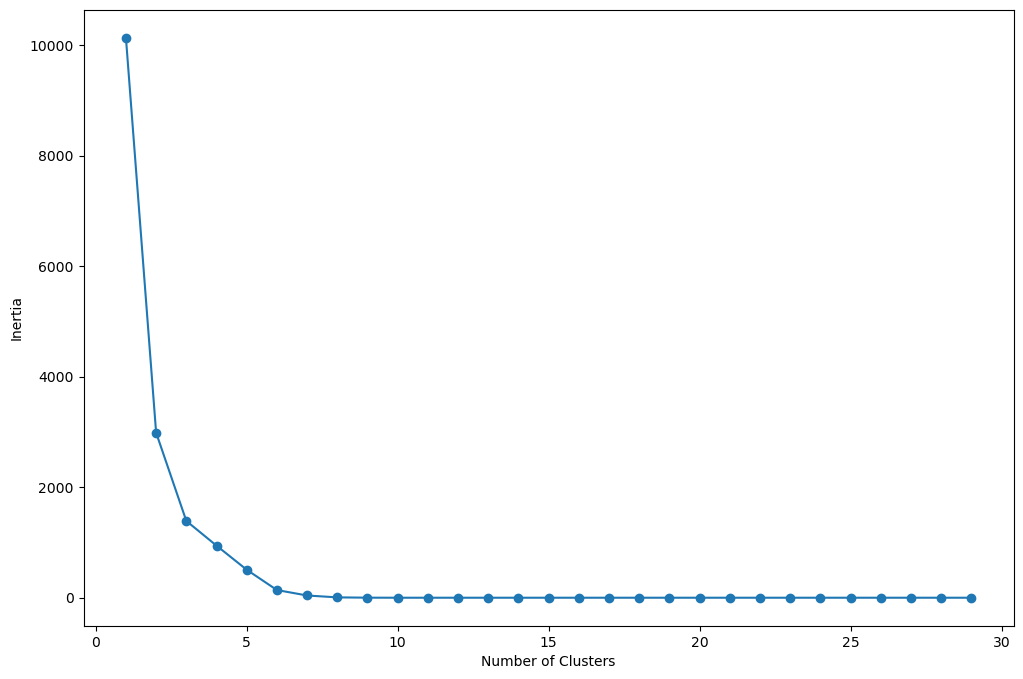

In [100]:
plt.figure(figsize=(12,8))
plt.plot(frame["cluster"],frame["SSE"],marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

#### Observations
* As per my observation K=4 or 5 is the best value of k.

In [101]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


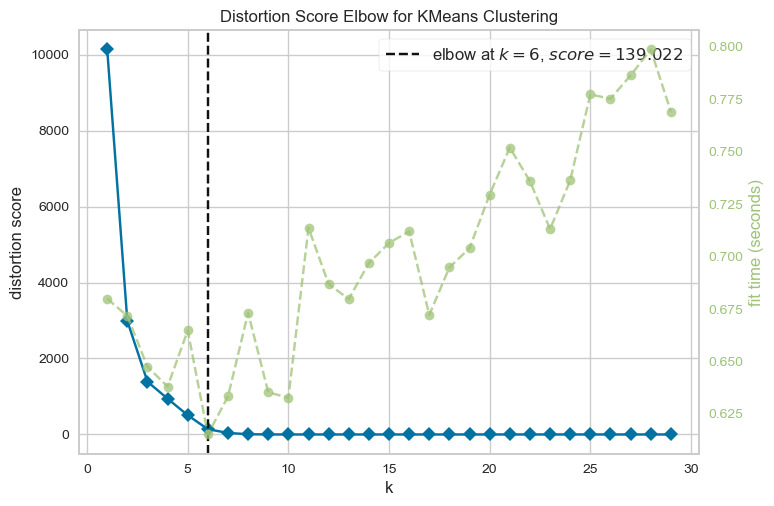

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,30)).fit(New_Data)
visualizer.show()

#### applying the best k value in KMeans algorithm

In [104]:
Km=KMeans(n_clusters=6,init="k-means++",max_iter=100,random_state=100)
y_km=Km.fit_predict(New_Data)
y_km

array([1, 0, 4, ..., 3, 0, 3])

In [105]:
RFM_Score["Cluster"]=Km.labels_
RFM_Score

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_ID,RFM_Sum,Loyality,Cluster
0,12346.0,326,2,0.00,1,1,1,111,3,Silver,1
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,0
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold,4
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,0
4,12350.0,311,1,334.40,1,1,1,111,3,Silver,1
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver,1
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver,1
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond,3
4370,18283.0,4,16,2094.88,4,1,2,412,7,Platinum,0


In [106]:
RFM_Score

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_ID,RFM_Sum,Loyality,Cluster
0,12346.0,326,2,0.00,1,1,1,111,3,Silver,1
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,0
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold,4
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,0
4,12350.0,311,1,334.40,1,1,1,111,3,Silver,1
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver,1
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver,1
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond,3
4370,18283.0,4,16,2094.88,4,1,2,412,7,Platinum,0


#### Creating segments based on the RFm_ID

In [107]:
seg_map={
    r'[1][1-2][2-3]':"Inactive",
    r'[1-2][1-3][3]':"at-risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
#     r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"Promising",
    r'[1-2][1-4][1-2]':"New_Customer",
    r'[3-4][1-4][1]':"Target_Upsell",
    r'[3-4][1-2][1-2]':"Nurture",
    r'[3-4][1-2][3-4]':"Drive_Loyality"
}

RFM_Score["Segment"]=RFM_Score["RFM_ID"].replace(seg_map,regex=True)

In [108]:
RFM_Score["RFM_Sum"].unique()

array([ 3,  7,  5,  6,  4,  8,  9, 11, 10, 12], dtype=int64)

#### Draw the pie chart

In [109]:
RFM_Score["Segment"].value_counts()

New_Customer      1982
Target_Upsell     1144
Nurture            971
Drive_Loyality     183
Inactive            59
Promising           20
at-risk             13
Name: Segment, dtype: int64

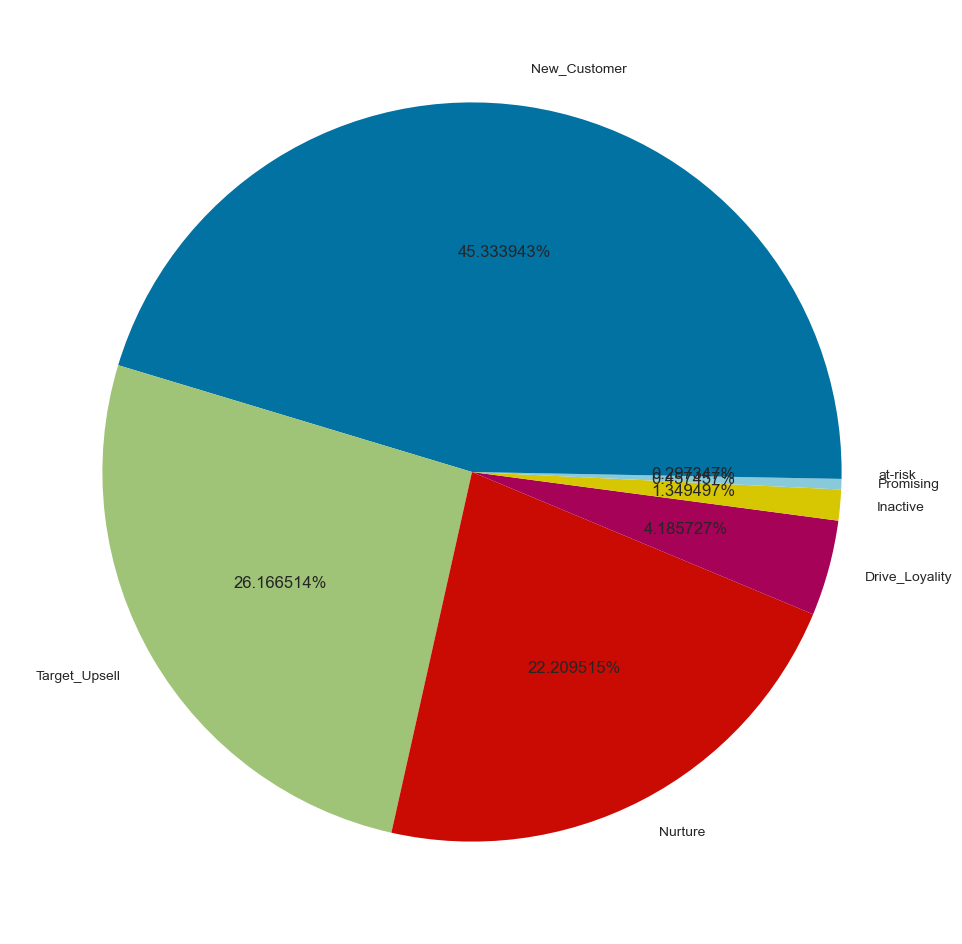

In [112]:
plt.figure(figsize=(16,12))
plt.pie(RFM_Score.Segment.value_counts(),labels=RFM_Score.Segment.value_counts().index,autopct="%2f%%")
plt.show()

#### Evaluation of sillhoutte score(SS)
* if 0<SS<1  - data is good
* if SS<0 - we have to re-work on the data

##### Silhouette Analysis¶
* silhouette score=p−q/max(p,q)
* p is the mean distance to the points in the nearest cluster that the data 
   point is not a part of
* q is the mean intra-cluster distance to all the points in its own cluster.
* The value of the silhouette score range lies between -1 to 1.
* A score closer to 1 indicates that the data point is very similar to other
  data points in the cluster,
* A score closer to -1 indicates that the data point is not similar to the 
  data points in its cluster.

** Silhouette analysis helps you assess the quality of clustering and find 
  the number of clusters that best fits your data. Let's break down the code
    and understand its purpose:
** Purpose of Silhouette Analysis: Silhouette analysis helps you assess the 
    quality of clustering for different numbers of clusters.The silhouette 
    score ranges from -1 to 1, with higher values indicating better cluster 
    separation and cohesion. By examining silhouette scores for various 
    cluster numbers, you can determine the optimal number of clusters that 
    best fit your data. In summary, this code performs silhouette analysis
    for a range of cluster numbers using K-Means clustering on the 
    standardized RFM data. It helps you select the number of clusters that
    provides the best clustering quality for your data.
 * A higher score indicates better cluster separation and cohesion.

 *A score close to 0 suggests overlapping or ambiguous clusters.

* A negative score means that data points might be assigned to the wrong clusters.

In [115]:
labels=Km.labels_
from sklearn.metrics import silhouette_score
print(silhouette_score(New_Data,labels))

0.9610150627934357


#### Find business trend as per day, month, season and time
* Base is the invoice count 

In [116]:
df.head(10)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,set 7 babushka nesting boxes,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,glass star frosted t-light holder,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,hand warmer union jack,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,hand warmer red polka dot,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,assorted colour bird ornament,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [118]:
# Creating df1 Dataframe with only required columns (InvoiceNo, InvoiceDate)
df1= df[["InvoiceNo","InvoiceDate"]]

In [119]:
df1

,InvoiceNo,InvoiceDate
0,536365,2010-12-01 08:26:00
1,536365,2010-12-01 08:26:00
2,536365,2010-12-01 08:26:00
3,536365,2010-12-01 08:26:00
4,536365,2010-12-01 08:26:00
...,...,...
541904,581587,2011-12-09 12:50:00
541905,581587,2011-12-09 12:50:00
541906,581587,2011-12-09 12:50:00
541907,581587,2011-12-09 12:50:00


In [121]:
import calendar as cr

In [122]:
cr.day_name[df1["InvoiceDate"][0].weekday()]

'Wednesday'

In [123]:
cr.day_name[df1["InvoiceDate"][1].weekday()]

'Wednesday'

In [124]:
cr.day_name[df1["InvoiceDate"][2].weekday()]

'Wednesday'

In [132]:
# Extract day from the date time column
def Extract_Day(d):
    return cr.day_name[d.weekday()]

In [133]:
## Create a column named "Day"

In [134]:
df1["Day"]=df1["InvoiceDate"].apply(Extract_Day)
df1

,InvoiceNo,InvoiceDate,Day
0,536365,2010-12-01 08:26:00,Wednesday
1,536365,2010-12-01 08:26:00,Wednesday
2,536365,2010-12-01 08:26:00,Wednesday
3,536365,2010-12-01 08:26:00,Wednesday
4,536365,2010-12-01 08:26:00,Wednesday
...,...,...,...
541904,581587,2011-12-09 12:50:00,Friday
541905,581587,2011-12-09 12:50:00,Friday
541906,581587,2011-12-09 12:50:00,Friday
541907,581587,2011-12-09 12:50:00,Friday


<Axes: xlabel='Day', ylabel='count'>

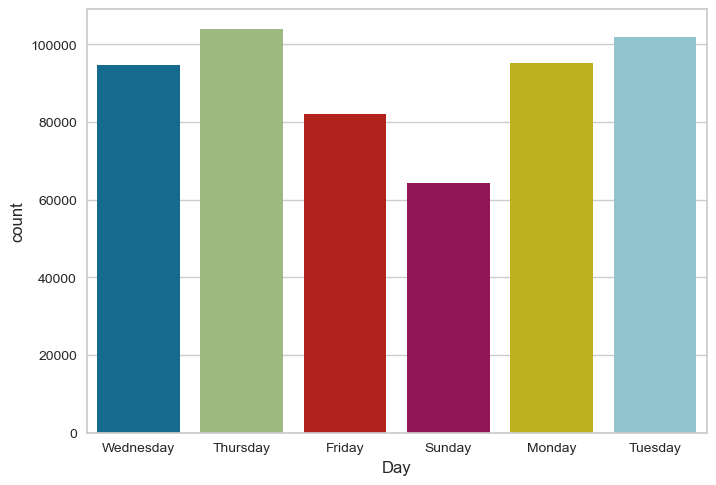

In [135]:
# count plot for day
sns.countplot(x=df1["Day"])

#### observations
* Thursday is the day when highest no of invoices are generated. follwing by 
  tuesday is the second highest. similarly we can make an onservation:
        Thursday>tuesday>wednwsday>monday>fridey>sunday
* Saturday is the off day. no invoices is generated on saturday.

In [143]:
## Similarly creating the column for month and finding the business


In [139]:
df1["Month"]=df1["InvoiceDate"].dt.strftime("%b")
df1.head()

,InvoiceNo,InvoiceDate,Day,Month
0,536365,2010-12-01 08:26:00,Wednesday,Dec
1,536365,2010-12-01 08:26:00,Wednesday,Dec
2,536365,2010-12-01 08:26:00,Wednesday,Dec
3,536365,2010-12-01 08:26:00,Wednesday,Dec
4,536365,2010-12-01 08:26:00,Wednesday,Dec


In [141]:
## Similarly for year
df1["Year"]=df1["InvoiceDate"].dt.strftime("%Y")
df1.head()

,InvoiceNo,InvoiceDate,Day,Month,Year
0,536365,2010-12-01 08:26:00,Wednesday,Dec,2010
1,536365,2010-12-01 08:26:00,Wednesday,Dec,2010
2,536365,2010-12-01 08:26:00,Wednesday,Dec,2010
3,536365,2010-12-01 08:26:00,Wednesday,Dec,2010
4,536365,2010-12-01 08:26:00,Wednesday,Dec,2010


In [142]:
print(df1["Year"].max())
print(df1["Year"].min())

2011
2010


<Axes: xlabel='Month', ylabel='count'>

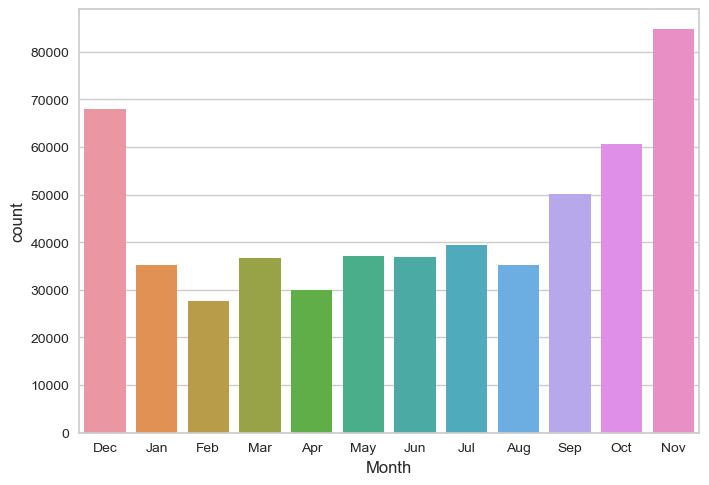

In [144]:
sns.countplot(x=df1["Month"])

#### Observations
* As we can see NOV month has a highest business following by Dec.
* Feb has the least business month.

<Axes: xlabel='Month', ylabel='count'>

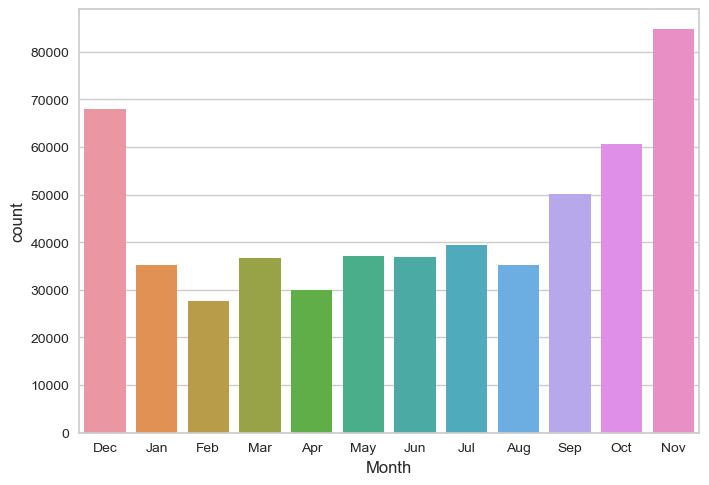

In [180]:
sns.countplot(x=df1["Month"])

In [150]:
## Now we will going to find business trend for seasons of the year
def Seasons_of_Year(Season):
    year=str(Season.year)
    seasons={'spring': pd.date_range(start= year +'-03-21 00:00:00', end=year + '-06-20 00:00:00'),
               'summer': pd.date_range(start= year + '-06-21 00:00:00', end= year + '-09-22 00:00:00'),
               'autumn': pd.date_range(start= year + '-09-23 00:00:00', end= year + '-12-20 00:00:00')
        }
    if Season in seasons['spring']:
        return 'spring'
    if Season in seasons['summer']:
        return 'summer'
    if Season in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'


In [152]:
df1.head()

,InvoiceNo,InvoiceDate,Day,Month,Year
0,536365,2010-12-01 08:26:00,Wednesday,Dec,2010
1,536365,2010-12-01 08:26:00,Wednesday,Dec,2010
2,536365,2010-12-01 08:26:00,Wednesday,Dec,2010
3,536365,2010-12-01 08:26:00,Wednesday,Dec,2010
4,536365,2010-12-01 08:26:00,Wednesday,Dec,2010


In [153]:
df1['season'] = (df1['InvoiceDate'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df1['season_name'] = df1['season'].map(seasons)

In [154]:
df1.head()

,InvoiceNo,InvoiceDate,Day,Month,Year,season,season_name
0,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter
1,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter
2,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter
3,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter
4,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter


<Axes: xlabel='season_name', ylabel='count'>

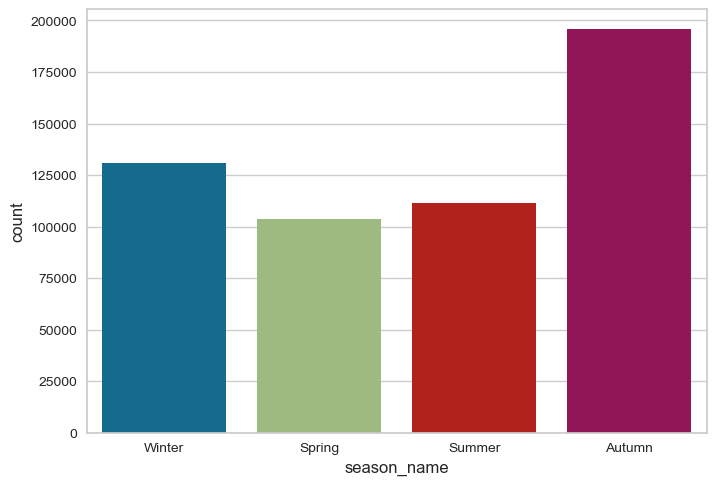

In [156]:
sns.countplot(x=df1["season_name"])

#### Observation 
* Auntumn season has the highest business 
* spring season has lowest business

In [157]:
df1.head()

,InvoiceNo,InvoiceDate,Day,Month,Year,season,season_name
0,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter
1,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter
2,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter
3,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter
4,536365,2010-12-01 08:26:00,Wednesday,Dec,2010,1,Winter


In [159]:
df2=df1[["InvoiceNo","InvoiceDate"]]
df2.head()

,InvoiceNo,InvoiceDate
0,536365,2010-12-01 08:26:00
1,536365,2010-12-01 08:26:00
2,536365,2010-12-01 08:26:00
3,536365,2010-12-01 08:26:00
4,536365,2010-12-01 08:26:00


In [169]:
df2["Date"]=pd.to_datetime(df2["InvoiceDate"]).dt.date
df2["Time"]=pd.to_datetime(df2["InvoiceDate"]).dt.time

In [170]:
df2.head()

,InvoiceNo,InvoiceDate,Date,Time
0,536365,2010-12-01 08:26:00,2010-12-01,08:26:00
1,536365,2010-12-01 08:26:00,2010-12-01,08:26:00
2,536365,2010-12-01 08:26:00,2010-12-01,08:26:00
3,536365,2010-12-01 08:26:00,2010-12-01,08:26:00
4,536365,2010-12-01 08:26:00,2010-12-01,08:26:00


In [205]:
# df2=df2.groupby(["Time"]).sum()
# df2.head(10)

In [206]:
# df_final.head()

In [173]:
df_final["Date"]=pd.to_datetime(df_final["InvoiceDate"]).dt.date
df_final["Time"]=pd.to_datetime(df_final["InvoiceDate"]).dt.time

In [198]:
#df_final.head()

In [199]:
# df_final["Time"]=df_final["Time"]%24
# df_final.head()

In [200]:
# df2=df_final.groupby(["Time"]).sum()
# df2.head(10)

In [201]:
# df2.reset_index()

In [202]:
# df_final.info()

In [203]:
# df_final["Time"].nunique()

In [204]:
# df_New=df_final[["Total_Price","Time"]]
# df_New.head()

In [189]:
def create_hours_column(dataframe, time_column_name):
    # Convert the "time" column to datetime format
    dataframe[time_column_name] = pd.to_datetime(dataframe[time_column_name])

    # Extract the hour component and create a new "hours" column
    dataframe['hours'] = dataframe[time_column_name].dt.hour

    # If you want to ensure that the "hours" column contains 24 hours
    dataframe['hours'] = dataframe['hours'] % 24

    return dataframe

In [190]:
df_hour=create_hours_column(df_final,"InvoiceDate")

In [191]:
df_hour.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_Price,Date,Time,hours
0,536365,2010-12-01 08:26:00,17850.0,139.12,2010-12-01,08:26:00,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,2010-12-01,08:28:00,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,2010-12-01,08:34:00,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,2010-12-01,08:34:00,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,2010-12-01,08:35:00,8


<Axes: xlabel='hours', ylabel='count'>

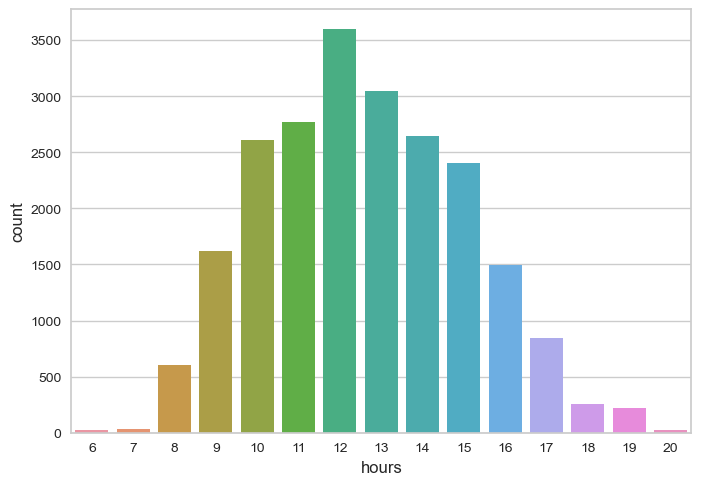

In [193]:
sns.countplot(x=df_hour["hours"])

#### Observations
* Business is at peak around 12pm. From 8am it is increased and peacked at 
  12pm and then slowly decreased upto 17pm. after that it decreased to zero
  after 20. from 20 to morning 6 there is no business, we can say market is
  market is closed.

### To Find Best Selling Product

In [207]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


### for best selling product
* We have to make new dataframe in which we will include columns which 
  are relevent to find beast selling product.
* Relevent columns are- InvoiceNo, StockCode, Quantity, Description

In [217]:
df_best_selling_product=df[["InvoiceNo","StockCode","Description","Quantity"]]
df_best_selling_product.head()

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,71053,WHITE METAL LANTERN,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


#### 
* Now we will convert this dataframe into 2 data frames. in first we will 
  sum all the quantities which have same StockCode. In second we will 
  create a Unique description column which doesn't have duplicates. then 
  merge both the dataframes and get final dataset.

In [218]:
df_best_selling_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  540455 non-null  object
 3   Quantity     541909 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 16.5+ MB


In [219]:
df_best_selling_product=df_best_selling_product.dropna(axis=0)

In [220]:
df_best_selling_product.head()

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,71053,WHITE METAL LANTERN,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [221]:
df_best_selling_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    540455 non-null  object
 1   StockCode    540455 non-null  object
 2   Description  540455 non-null  object
 3   Quantity     540455 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 20.6+ MB


In [222]:
df_best_selling_product.nunique()

InvoiceNo      24446
StockCode       3958
Description     4223
Quantity         671
dtype: int64

In [249]:
df_best_selling_product_1=df_best_selling_product.groupby(["StockCode"]).sum()

In [251]:
df_best_selling_product_1.head()

,Quantity
StockCode,
10002,860
10080,325
10120,193
10125,1296
10133,2775


In [253]:
df_best_selling_product.head()

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,71053,WHITE METAL LANTERN,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [255]:
df_best_selling_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    540455 non-null  object
 1   StockCode    540455 non-null  object
 2   Description  540455 non-null  object
 3   Quantity     540455 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 20.6+ MB


In [258]:
df_best_selling_product=df_best_selling_product.drop(columns="InvoiceNo")

In [259]:
df_best_selling_product.head()

,StockCode,Description,Quantity
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,71053,WHITE METAL LANTERN,6
2,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [261]:
df_best_selling_product.isnull().sum()

StockCode      0
Description    0
Quantity       0
dtype: int64

In [262]:
df_no_duplicates = df_best_selling_product.drop_duplicates(subset=['StockCode', 'Description'])

In [263]:
df_no_duplicates.head()

,StockCode,Description,Quantity
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,71053,WHITE METAL LANTERN,6
2,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [275]:
df_no_duplicates_1=df_no_duplicates.groupby(["StockCode"]).sum()

In [277]:
df_no_duplicates_1.head()  

,Quantity
StockCode,
10002,48
10080,24
10120,1
10125,2
10133,-77


In [278]:
df_no_duplicates_1.reset_index()

,StockCode,Quantity
0,10002,48
1,10080,24
2,10120,1
3,10125,2
4,10133,-77
...,...,...
3953,gift_0001_20,11
3954,gift_0001_30,1
3955,gift_0001_40,1
3956,gift_0001_50,1


In [279]:
df_no_duplicates_2=df_no_duplicates.groupby(["Description"]).sum()

In [281]:
df_no_duplicates_2.reset_index()

,Description,Quantity
0,20713,-400
1,4 PURPLE FLOCK DINNER CANDLES,2
2,50'S CHRISTMAS GIFT BAG LARGE,12
3,DOLLY GIRL BEAKER,2
4,I LOVE LONDON MINI BACKPACK,1
...,...,...
4218,wrongly marked carton 22804,-256
4219,wrongly marked. 23343 in box,-3100
4220,wrongly sold (22719) barcode,170
4221,wrongly sold as sets,-600


In [283]:
max_score_row = df_no_duplicates_2.loc[df_no_duplicates_2['Quantity'].idxmax()]

In [284]:
max_score_row

Quantity    80995
Name: PAPER CRAFT , LITTLE BIRDIE, dtype: int64

In [285]:
df_no_duplicates_2["Quantity"].max()

80995

In [286]:
df_no_duplicates_2["Quantity"].min()

-15644